In [1]:
#VARIÁVEIS ALEATÓRIAS CONTÍNUAS
#link for random generation https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.beta.html#numpy.random.Generator.beta
#link for probability distribution functions https://docs.scipy.org/doc/scipy-0.16.1/reference/stats.html
import pandas as pd
# !pip install scipy

************* Continuous Uniform PROBABILITY DISTRIBUTIONS *************


,x,f(x),R(x)
0,1,0.166667,1.000000
1,2,0.166667,0.833333
2,3,0.166667,0.666667
3,4,0.166667,0.500000
4,5,0.166667,0.333333
5,6,0.166667,0.166667


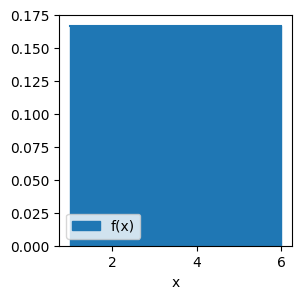

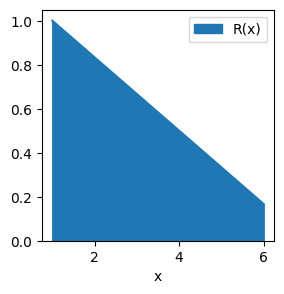

In [3]:
#Uniforme Contínua
from scipy.stats import uniform
x = list(range(1, 7))#exemplo do dado, Omega_x = (1, 2, ...., 6)
# print(x)
dist = uniform(1, 6)#Omega_X = {x\in R| x \in [1, 1+5]}
Px = dist.pdf(x)#probability density function: f(X=x) = (d/dx)P(X<=x)
Rx = dist.sf(x)#Reliability/Survival function: P(X>x) = 1 - P(X<=x)

def printContinuousDistributions(x, Px, Rx, distName):
    dic = {'x':x, 'f(x)':Px, 'R(x)': Rx}
    # print(dic)
    df = pd.DataFrame(data=dic)
    print("************* " + distName + " PROBABILITY DISTRIBUTIONS *************")
    display(df)
    df.plot.area(x = 'x', y = 'f(x)', figsize = (3,3))
    df.plot.area(x = 'x', y = 'R(x)', figsize = (3,3))
printContinuousDistributions(x, Px, Rx, "Continuous Uniform")

************* Exponential PROBABILITY DISTRIBUTIONS *************


,x,f(x),R(x)
0,0,0.005000,1.000000
1,1,0.004975,0.995012
2,2,0.004950,0.990050
3,3,0.004926,0.985112
4,4,0.004901,0.980199
...,...,...,...
995,995,0.000035,0.006909
996,996,0.000034,0.006874
997,997,0.000034,0.006840
998,998,0.000034,0.006806


Fx_3s_direita - Fx_3s_esquerda = 1.0


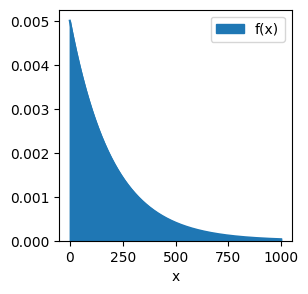

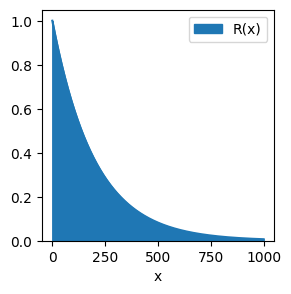

In [6]:
#Exponencial
from scipy.stats import expon
#X: Tempo até a falha de um avião (em anos)
myLambda = .005#taxa de ocorrências de falhas por ano (i.e. por unidade de medida)
myMean = 1/myLambda
mySd = myMean**2

x = list(range(0,1000))
dist = expon(scale = myMean, loc = 0)#Omega_X = {x\in R| x > 0}
Px = dist.pdf(x)#probability density function: f(X=x) = (d/dx)P(X<=x)
Rx = dist.sf(x)#Reliability/Survival function: P(X>x) = 1 - P(X<=x)
printContinuousDistributions(x, Px, Rx, "Exponential")

Fx_3s_esquerda = dist.cdf(x = myMean - 3*mySd)#P(X<= m - 3*s)
Fx_3s_direita = dist.cdf(x = myMean + 3*mySd)#P(X<= m + 3*s)
print('Fx_3s_direita - Fx_3s_esquerda = ' + str(Fx_3s_direita - Fx_3s_esquerda))

************* Normal PROBABILITY DISTRIBUTIONS *************


,x,f(x),R(x)
0,0.780000,0.014773,0.998650
1,0.798182,0.017686,0.998356
2,0.816364,0.021096,0.998004
3,0.834545,0.025071,0.997585
4,0.852727,0.029686,0.997088
...,...,...,...
95,2.507273,0.029686,0.002912
96,2.525455,0.025071,0.002415
97,2.543636,0.021096,0.001996
98,2.561818,0.017686,0.001644


Fx_3s_direita - Fx_3s_esquerda = 0.9973002039367398


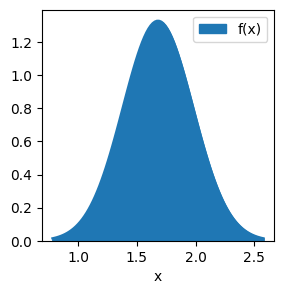

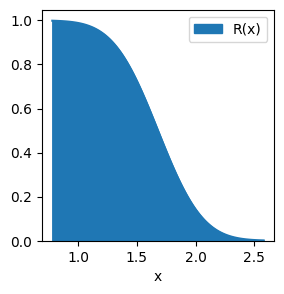

In [5]:
#Normal
from scipy.stats import norm
import numpy as np
#X: estatura de uma pessoa qualquer, do grupo de interesse (em metros)
m = 1.68 #(estatura média em metros)
s = 0.3 #desvio-padrão da estatura (em metros)
x = np.linspace(m - 3*s, m + 3*s, 100)#take 100 evenly spaced points between (m - 3*s) and (m + 3*s)
dist = norm(loc = m, scale = s)#Omega_X = {x\in R}
Px = dist.pdf(x)#probability density function: f(X=x) = (d/dx)P(X<=x)
Rx = dist.sf(x)#Reliability/Survival function: P(X>x) = 1 - P(X<=x)
printContinuousDistributions(x, Px, Rx, "Normal")

Fx_3s_esquerda = dist.cdf(x = m - 3*s)#P(X<= m - 3*s)
Fx_3s_direita = dist.cdf(x = m + 3*s)#P(X<= m + 3*s)
print('Fx_3s_direita - Fx_3s_esquerda = ' + str(Fx_3s_direita - Fx_3s_esquerda))

In [9]:
#Misturando distribuições normal e binomial
from scipy.stats import binom
#X: estatura de uma pessoa qualquer, do grupo de interesse (em metros)
# X ~Normal (mu = m=1.68, sd = s = 0.3)
distX = norm(loc = 1.68, scale = .1)
P_x_maiorque1_9 = distX.sf(x = 1.9)#P(X>1.9)
print("P(X>1.90m) = " + str(P_x_maiorque1_9))
#Y: nº de pessoas do grupo com estatura superior a 1.9m
#O grupo envolve 200 pessoas
#Y~binomial (n=200, p=P_x_maiorque1_9)
distY = binom(n = 200, p = P_x_maiorque1_9)
pYmaiorQue5 = distY.sf(5)#P(Y>5)
print(f"P(Y>5 pessoas) = {pYmaiorQue5}")

P(X>1.90m) = 0.013903447513498616
P(Y>5 pessoas) = 0.062104432430228104
